<h2>Name: Shivam Pawar <br>
    <br>
    Uid: 2019230068 <br>
    <br>
    Objective: To predict whether the image is fake or real.</h2>

<h3> Project Abstract: </h3>


1. Deep learning is used to solve various complex problems ranging from big data analytics to    computer vision and human-level control.

2. One of those deep learning-powered applications recently emerged is deepfake. 

3. Deepfake algorithms can create fake images and videos that humans cannot distinguish them from authentic ones.

4. The proposal of technologies that can automatically detect and assess the integrity of digital visual media is therefore indispensable. 

5. We can detect the DeepFake using Convolutional Neural Network and Recurrent Neural Network. 

6. System uses a Convolutional Neural Network (CNN) to extract features at the frame level.

7. So there is one model called Mesonet, it is a convolutional neural network which is developed exactly for this purpose,so in this project I have used this model to predict the image is whether real or fake.

8. In this project,I have examined four sets of images, correctly identified real and fake images, misclassified real and fake images

<b>Step1 :</b>

1. Initially we need to download the required libraries, that are numpy, tensorflow, keras.
2. We use numpy for squeezing the images.
3. Tensorflow and keras are used for implementing CNN model and ImageDataGenerator
4. Dataset for this project is downloaded from kaggle.
5. Dataset link: https://www.kaggle.com/c/deepfake-detection-challenge

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import tensorflow as tf

<b>Step2 :</b>

1. Create a dictonary to store height, width and channel of the images.
2. Channel is set as 3, because we are using colored images (r,g,b).
3. If the images are black and white then we set channels as 2 (b,w).


In [3]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}


<b>Step3 :</b>

1. Create class Classifier, which has all essential methods to load weights and make the predicitions.

In [7]:

# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

<b>Step4 :</b>

1. Create Meso class, it just take's one argument i.e the Classifier class we created in step3.
2. Here we set the gradient desecent optimizer, and its learning rate in the constructor and we set parameters to compile the model.
3. Next to create the network architecture, we create init_model method in which we first take the input with three dimensions and assign it to variable x.
4. We create 4 convolutional blocks, each block has  Convolutional layer, MaxPooling layer, Batch Normalization layer.
5. In Convolutional layer we set the size and number of filters we will use in convolution.
6. MaxPooling layer is used to significantly reduce the dimension of the data which helps to speed up the computation.
7. Batch Normalization is used to improve the speed, performance and stability of the neural network. It works by normalizing the input data.


In [8]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)

        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
        
        dataGenerator = ImageDataGenerator(rescale=1./255,validation_split=0.2)
        # Instantiating generator to feed images through the network
        generator = dataGenerator.flow_from_directory(
            './data/',
            target_size=(256, 256),
            batch_size=1,
            class_mode='binary')
        
        val = dataGenerator.flow_from_directory('./data/',
                                          class_mode="binary",
                                          target_size=(256, 256),
                                          batch_size=1,
                                          subset="validation"
                                          )
        
        hist =  self.model.fit_generator(generator,
                    epochs=20,
                    
                    validation_data=val)         
        self.model.summary()
    
   
    
    def init_model(self):
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)
        return Model(inputs = x, outputs = y)

<b>Step5 :</b>

1. Now as we have set the architecture of the network, now we need to load the wieghts from MesoReposeitry stored in folder named "weights" and named as Meso4_DF. 

2. Download link of file Meso4_DF is: https://github.com/kiteco/python-youtube-code/blob/master/Deepfake-detection/weights/Meso4_DF

3. After completing the 20 ephochs I was getting the training accuracy as 94% and val_accuracy as 64%

In [14]:
meso = Meso4()
meso.load('./weights/Meso4_DF')

Found 907 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Epoch 1/20
907/907 [==============================] - 65s 71ms/step - loss: 0.2159 - accuracy: 0.7299 - val_loss: 0.1972 - val_accuracy: 0.7611
Epoch 2/20
907/907 [==============================] - 64s 70ms/step - loss: 0.1285 - accuracy: 0.8346 - val_loss: 0.2888 - val_accuracy: 0.6389
Epoch 3/20
907/907 [==============================] - 63s 70ms/step - loss: 0.1053 - accuracy: 0.8710 - val_loss: 0.2317 - val_accuracy: 0.6833
Epoch 4/20
907/907 [==============================] - 67s 73ms/step - loss: 0.1046 - accuracy: 0.8677 - val_loss: 0.2885 - val_accuracy: 0.6278
Epoch 5/20
907/907 [==============================] - 65s 71ms/step - loss: 0.0946 - accuracy: 0.8787 - val_loss: 0.2996 - val_accuracy: 0.6167
Epoch 6/20
907/907 [==============================] - 64s 70ms/step - loss: 0.0935 - accuracy: 0.8809 - val_loss: 0.2829 - val_accuracy: 0.6389
Epoch 7/20
907/907 [==============================] - 

In [9]:
class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)

        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
        
        dataGenerator = ImageDataGenerator(rescale=1./255,validation_split=0.2)
        # Instantiating generator to feed images through the network
        generator = dataGenerator.flow_from_directory(
            './data/',
            target_size=(256, 256),
            batch_size=1,
            class_mode='binary')
        
        val = dataGenerator.flow_from_directory('./data/',
                                          class_mode="binary",
                                          target_size=(256, 256),
                                          batch_size=1,
                                          subset="validation"
                                          )
        
        hist =  self.model.fit_generator(generator,
                    epochs=20,
                    
                    validation_data=val)         
        self.model.summary()
    
   
    
    def init_model(self):
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)
        return Model(inputs = x, outputs = y)

In [10]:
meso = Meso4()
meso.load('./weights/Meso4_DF')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Found 1000 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1000/1000 [==============================] - 108s 107ms/step - loss: 0.2778 - accuracy: 0.6910 - val_loss: 0.5715 - val_accuracy: 0.3920
Epoch 2/20
1000/1000 [==============================] - 82s 82ms/step - loss: 0.1822 - accuracy: 0.7970 - val_loss: 0.5168 - val_accuracy: 0.4422
Epoch 3/20
1000/1000 [==============================] - 94s 94ms/step - loss: 0.1654 - accuracy: 0.8060 - val_loss: 0.3913 - val_accuracy: 0.4874
Epoch 4/20
1000/1000 [==============================] - 112s 112ms/step - loss: 0.1306 - accuracy: 0.8360 - val_loss: 0.3313 - val_accuracy: 0.5879
Epoch 5/20
1000/1000 [==============================] - 128s 128ms/step - loss: 0.1453 - accuracy: 0.8180 - val_loss: 0.4081 - val_accuracy: 0.5176
Epoch 6/20
1000/1000 [==============================] - 108s 108ms/step - loss: 0.1294 - accuracy: 0.8380 - val_loss: 0.3340 - val_accuracy: 0.5578
Epoch 7/20
1000/1000 [==============================] - 110s 110ms/step - loss: 0.1246 - accuracy: 0.8490 - val_loss

<h3>Step6:</h3>
    
1. Now as we are all set with training part, now we need to prepare the image data by labeling it as 0 and 1 for fake and real using ImageDataGenerator.


In [12]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')



Found 1000 images belonging to 2 classes.


In [13]:
val = dataGenerator.flow_from_directory('./data/',
                                          class_mode="binary",
                                          target_size=(256, 256),
                                          batch_size=1,
                                          subset="validation"
                                          )

Found 199 images belonging to 2 classes.


In [14]:
# Checking class assignment
generator.class_indices

{'DeepFake': 0, 'Real': 1}

<h3>Step7:</h3>
    
1. Now to test the working of the code, I have choosed a random image and feed it to the model and proccesed the image and done a prediction and plotted it below.
2. I have also displayed the percentage of model confidence, the actual label of image and Correct prediction. 


Predicted likelihood: 0.8841
Actual label: 1

Correct prediction: True


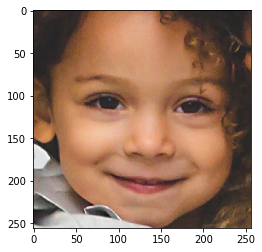

In [23]:

# Rendering image X with label y for MesoNet
X, y = generator.next()
pic = 
# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

<h3>Repeated step7:</h3>
    
1. I have also tried to predict my real image, the model was successfully able to predict the image with model confidence of 99%. 


Found 2 images belonging to 2 classes.
Predicted likelihood: 0.9995
Actual label: 1

Correct prediction: True


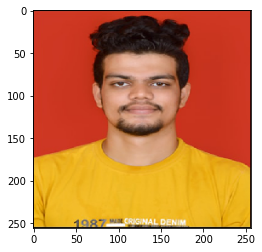

In [30]:
# Rendering image X with label y for MesoNet
# X, y = generator.next()
p = dataGenerator.flow_from_directory(
    './Mydata/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')
X, y = p.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

<h3>Step8:</h3>
    
1. Create 4 different categories to sort the data in proper catagories that are correct real, correct fake, misclassified real and misclassified fake.



In [16]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []


<h3>Step9:</h3>
    
1. In this step simply it iterate through entire dataset and feed it to the data to model and sort it in the proper category.


In [18]:

# Generating predictions on validation set, storing in separate lists
for i in range(len(generator.labels)):
    
    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        
    # Printing status update
    if i % 50 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

0  predictions completed.
50  predictions completed.
100  predictions completed.
150  predictions completed.
200  predictions completed.
250  predictions completed.
300  predictions completed.
350  predictions completed.
400  predictions completed.
450  predictions completed.
500  predictions completed.
550  predictions completed.
600  predictions completed.
650  predictions completed.
700  predictions completed.
750  predictions completed.
800  predictions completed.
850  predictions completed.
900  predictions completed.
950  predictions completed.
All 1000 predictions completed


<h3>Step10:</h3>
    
1. I last step we create a plotter method to plot the images from 4 different catogries. It takes two arguments, image and prediction.



In [54]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

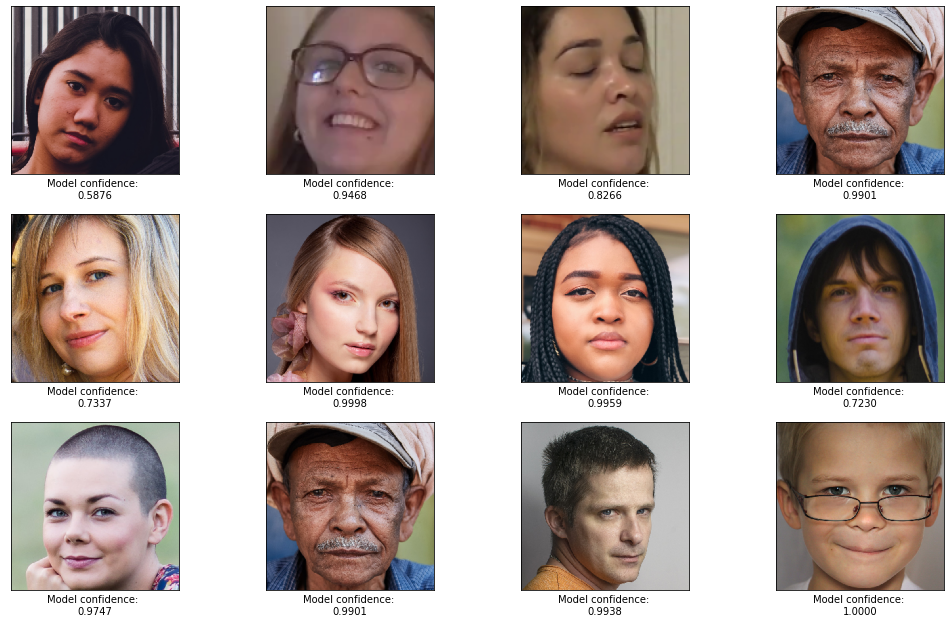

In [55]:
plotter(correct_real, correct_real_pred)

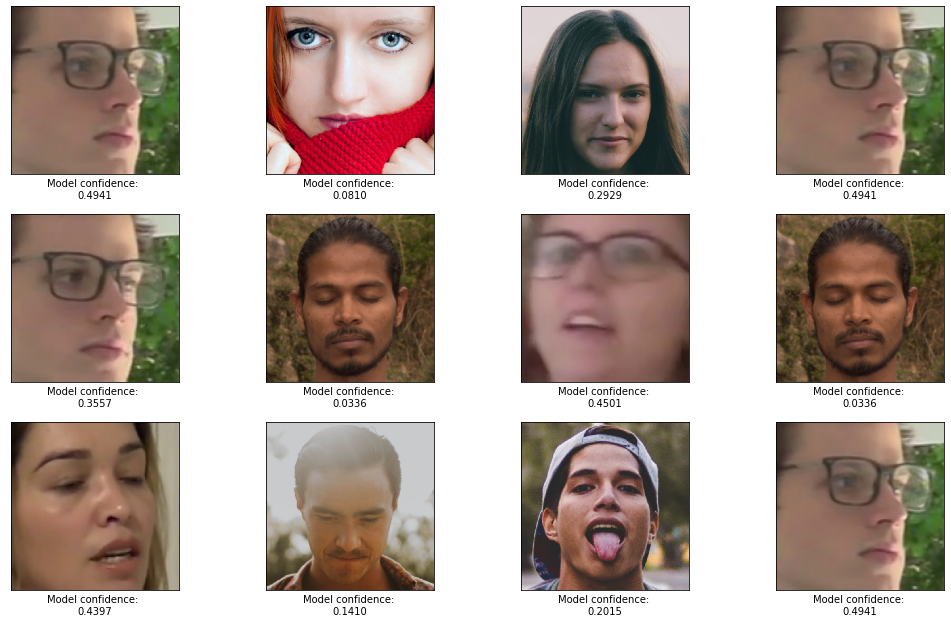

In [56]:
plotter(misclassified_real, misclassified_real_pred)

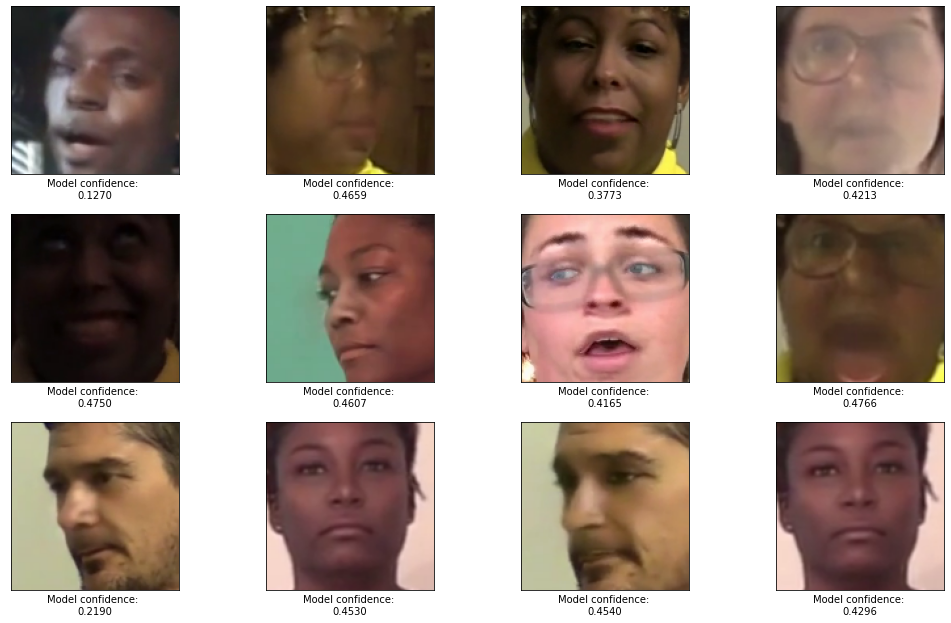

In [58]:
plotter(correct_deepfake, correct_deepfake_pred)

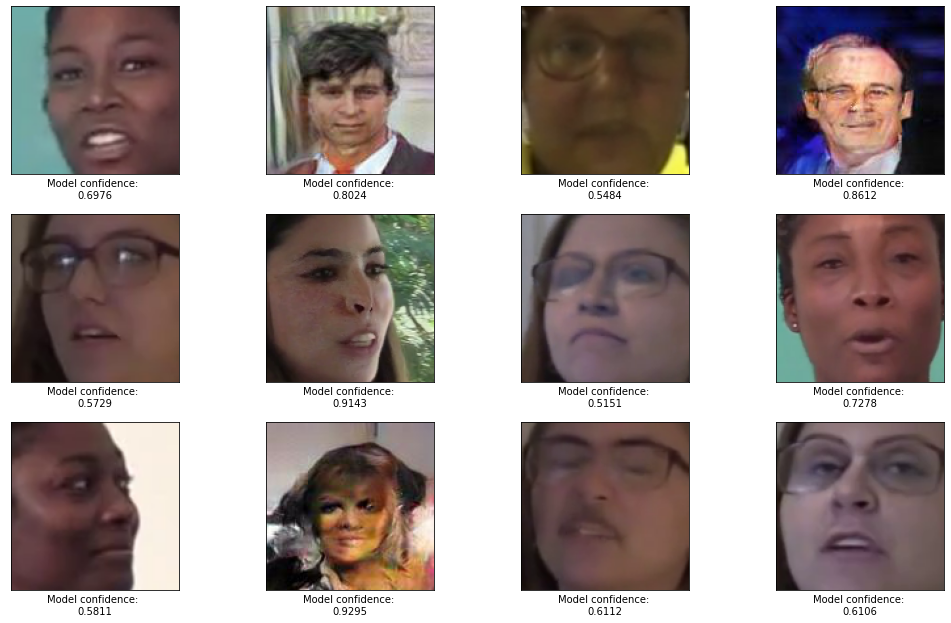

In [77]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)

<h3> Conclusion : </h3>

1. Deepfakes are synthetic media in which a person in an existing image or video is replaced with someone else's likeness.

2. Deepfakes leverage powerful techniques from machine learning and artificial intelligence to manipulate or generate visual and audio content with a high potential to deceive.

3. The main machine learning methods used to create deepfakes are based on deep learning and involve training generative neural network architectures, such as autoencoders or generative adversarial networks (GANs).

4. I have tried detecting the images using the mesonette model which is specifically designed for the purpose of detecting the images are fake or real. 

5. I have taken the dataset from kaggle and github which consist of real and fake images.

6. After 20th epoch, I was getting the accuracy of 94.16%

7. The performance of the model can be further improved by tune parameters, image data augmentation and properly handling the overfitting and underfitting problem.